In [1]:
import numpy as np
import matplotlib.pylab as plt
% matplotlib notebook

<IPython.core.display.Javascript object>


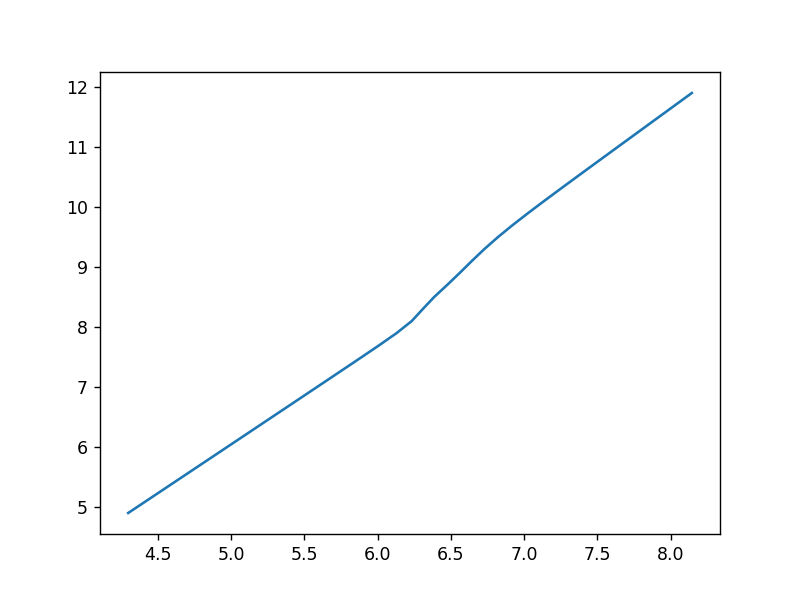

In [7]:
data = np.loadtxt('data/tite.dat',skiprows=3)
plt.figure(1)
plt.plot(data[:,1],data[:,0])

In [14]:
T = 67.7 # KS
T = 131.9 # XTE
T = 85
k_b = 8.617330350e-5
T /= k_b
T /= 0.8183 
print(T)
T_b = np.interp(np.log10(T),data[:,1],data[:,0])
print(0.8183*np.power(10,T_b))
print(0.8183*np.power(10,T_b)/1e8)

1205406.7868396693
53563375.5556
0.535633755556


<IPython.core.display.Javascript object>


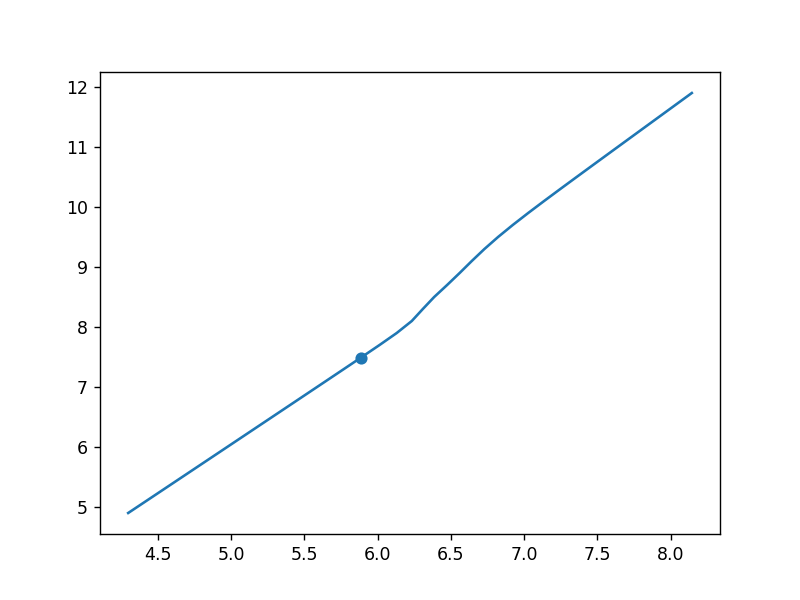

In [4]:
plt.figure(2)
plt.plot(data[:,1],data[:,0])
plt.scatter(np.log10(T),T_b)

In [2]:
MSun = 1.98892e33
LSun = 3.846e33
c = 2.99792458e10
G = 6.67259e-8
from_ev_to_erg = 1.6021766208e-12
from_yr_to_sec = 31536000

In [3]:
L = 6e37
M = L/0.1/MSun*from_yr_to_sec/c/c
print(M)

1.0585201667550303e-08


In [16]:
M = 0.2 #[g/s]
M /= MSun
M *= 1e18
M *= from_yr_to_sec

print(M)
print(M/2)

3.1711682722281444e-09
1.5855841361140722e-09


In [8]:
11*7/365

0.21095890410958903

In [2]:
def plot2(): 
    plot_style()
    k_b = 8.617330350e-5
    config = np.loadtxt('data/config.dat')
    data1 = np.loadtxt('output/cooling_GIPSF_' + str(0+35) + '.dat')
    outdata = np.zeros([len(data1[::5,0]),7])
    outdata[:,0] = (data1[::5, 1]-1.000170e3)*365

    for idx,lb in zip([3,2,1],['$\\rho_{\\rm acc} = 10^{13} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$',
    '$\\rho_{\\rm acc} = 10^{12.5} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$',
    '$\\rho_{\\rm acc} = 10^{12.0} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$']):
 
        data1 = np.loadtxt('output/cooling_GIPSF_' + str(idx+35) + '.dat')
        data2 = np.loadtxt('output/cooling_SF0_' + str(idx+35) + '.dat')

        plt.plot((data1[:, 1]-1.000170e3)*365, data1[:, 0]*k_b, color=colors2[idx],
             linewidth=line_thickness2[idx],zorder=order2[idx],label=lb)
        plt.plot((data2[:, 1]-1.000170e3)*365, data2[:, 0]*k_b, '--',color=colors2[idx],
             linewidth=line_thickness2[idx],zorder=order2[idx])
        outdata[:,idx*2-1] = data1[::5, 0]*k_b
        outdata[:,idx*2] = data2[::5, 0]*k_b

    plt.plot([10,10],[20,20],color='black',lw=2,label='GIPSF model')
    plt.plot([10,10],[20,20],'--',color='black',lw=2,label='No SF')
    np.savetxt('IGR.dat',outdata,fmt='%1.5e')
    
    plt.scatter(t_IGR, T_IGR, s=100, color='black', marker='^',label='IGR J17480--2446', zorder=6)
    plt.errorbar(x=t_IGR, y=T_IGR, yerr=err_IGR, color='black', fmt=' ',zorder=6)

    plt.xscale('log')
    plt.xticks([1,10,100,1000,10000], fontsize=20)
  
    plt.text(1.50,80,'$\dot{M} = 3.5\\times 10^{-9} \\thinspace \\rm M \\odot / yr$',fontsize=22)
    plt.text(1.50,73,'$kT_{\\rm s 0}^{\infty} = 69 \\thinspace \\thinspace \\rm eV$',fontsize=22)
    plt.text(1.50,69,'$\Delta t = 12.5 \\thinspace \\thinspace \\rm yr$',fontsize=22)
    
    plt.yticks(np.array([90,100,110,120,130,140,150,160,170,180])-30, fontsize=20)
    plt.ylim(80, 100)
    plt.xlabel('$\\rm Days \\thinspace  \\thinspace  since  \\thinspace  \\thinspace  '
               'onset \\thinspace  \\thinspace  of  \\thinspace  \\thinspace quiescence$',fontsize=22)
    plt.ylabel('$kT^{\infty}_{\\rm s}$ $\\rm eV$',fontsize=22)
    plt.legend(loc='upper right',fontsize=19,scatterpoints=1,frameon=False)
    fixlogax(plt.gca(), a='x')
    plt.xlim(1,10000)
    #plt.savefig('IGR.pdf',format='pdf')
    plt.show()
plot2()

NameError: name 'plot_style' is not defined